In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
# pip install pandas-profiling
import seaborn as sns
%matplotlib inline
import time
import datetime

traps = pd.read_csv('../assets/train.csv')
test = pd.read_csv('../assets/test.csv')
spray = pd.read_csv('../assets/spray.csv')
weather = pd.read_csv('../assets/weather.csv')

In [5]:

# skip the numeric columns, because they can't contain the 'M' string
check_missing_values = ['Depart','Heat','Cool','Sunrise','Sunset','Depth','Water1','SnowFall']
for col in weather[check_missing_values]:
    station_1 = len(weather[(weather[col].str.contains('\D')) & (weather.Station==1)])
    print col + ' has ' + str(station_1) + ' missing values at station 1'
    station_2 = len(weather[(weather[col].str.contains('\D')) & (weather.Station==2)])
    print col + ' has ' + str(station_2) + ' missing values at station 2'
    print ''

SyntaxError: invalid syntax (<ipython-input-5-e55ec90c3652>, line 5)

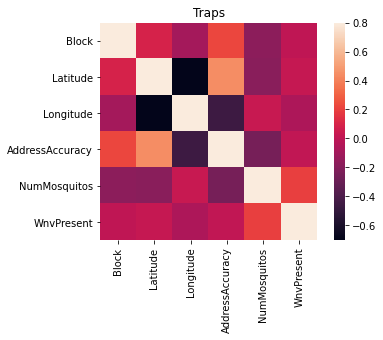

In [3]:
#Before adding anything, let's see what the feature correlation looks like
def find_correlation(data,title):
    correlation = data.corr()
    sns.heatmap(correlation, vmax=.8, square=True)
    plt.title(title)

find_correlation(traps, 'Traps')

In [ ]:
# Get rid of features that we cannot use
features = traps.columns.drop(['WnvPresent','Date','Trap'])

X = traps[features]
y = traps.WnvPresent